In [1]:
import numpy as np
import pandas as pd
import os
from pathlib import Path

In [112]:
# PATH = Path('stockdata/set-archive_EOD_UPDATE/')
# filelist = list(PATH.iterdir())
# allFiles = pd.concat((pd.read_csv(f) for f in filelist))

In [113]:
# allFiles.to_csv('stockdata/Update190818.csv')

In [133]:
# SET50 = allFiles[allFiles['<TICKER>'] == 'SET50']

In [134]:
# SET50.reset_index(inplace=True, drop=True)
# SET50.columns = ['Ticker','Date','Open','High','Low','Close','Vol']

In [135]:
# SET50.to_csv('stockdata/SET50190818.csv')

In [16]:
import torch.nn as nn
import torch
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

from fastai.metrics import *
from fastai.model import *
from fastai.dataset import *
from fastai.column_data import *
from fastai.structured import *

%matplotlib inline

In [3]:
PATH = 'stockdata/'

In [4]:
SET50 = pd.read_csv(f'{PATH}set50.csv',parse_dates=['date'])

In [5]:
SET50.head()

,date,ticker,open,high,low,close,vol
0,2010-01-04,SET50,522.48,522.93,513.24,518.54,1117259136
1,2010-01-05,SET50,522.92,525.36,516.77,518.12,1232977792
2,2010-01-06,SET50,520.02,522.14,518.19,520.96,2116183424
3,2010-01-07,SET50,523.53,525.25,519.03,519.67,1617786368
4,2010-01-08,SET50,520.98,525.29,520.75,523.70,1378444160


In [6]:
SET50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2057 entries, 0 to 2056
Data columns (total 7 columns):
date      2057 non-null datetime64[ns]
ticker    2057 non-null object
open      2057 non-null float64
high      2057 non-null float64
low       2057 non-null float64
close     2057 non-null float64
vol       2057 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 112.6+ KB


In [395]:
??add_datepart

In [7]:
SET50['dayofweek'] = SET50.date.dt.dayofweek #0=Monday, 7=Sunday
SET50['is_quater_end'] = SET50.date.dt.is_quarter_end #Is that date is quater end
SET50['is_quater_start'] = SET50.date.dt.is_quarter_start#Is that date is quater first date

In [8]:
df = SET50.copy()

In [9]:
df['target'] = df.close.shift(-1)

In [10]:
df.shape

(2057, 11)

In [11]:
df.tail()

,date,ticker,open,high,low,close,vol,dayofweek,is_quater_end,is_quater_start,target
2052,2018-06-04,SET50,1128.60,1135.22,1126.03,1131.82,1130584251,0,False,False,1141.39
2053,2018-06-05,SET50,1132.72,1143.14,1124.83,1141.39,2153234467,1,False,False,1145.95
2054,2018-06-06,SET50,1145.24,1150.87,1140.96,1145.95,1524290540,2,False,False,1141.12
2055,2018-06-07,SET50,1149.52,1152.40,1141.12,1141.12,1253078015,3,False,False,1130.91
2056,2018-06-08,SET50,1143.70,1143.87,1130.76,1130.91,1049557919,4,False,False,NaN


In [12]:
df.drop(len(df)-1, axis=0,inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 11 columns):
date               2056 non-null datetime64[ns]
ticker             2056 non-null object
open               2056 non-null float64
high               2056 non-null float64
low                2056 non-null float64
close              2056 non-null float64
vol                2056 non-null int64
dayofweek          2056 non-null int64
is_quater_end      2056 non-null bool
is_quater_start    2056 non-null bool
target             2056 non-null float64
dtypes: bool(2), datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 164.6+ KB


In [14]:
drop = ['date', 'ticker','open','high','low']
df.drop(drop, axis=1, inplace=True)

In [17]:
x, y, nas, mapper = proc_df(df, 'target',do_scale=True,max_n_cat=8)

In [306]:
x = df.drop('target',axis=1).values
y = df['target'].values

In [312]:
df['zeross'] = np.zeros(len(df))

In [314]:
df.zeross[df.target > df.Close] = 1

C:\Users\Bestz\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [20]:
n_train = 2031
x_train = x[:n_train]
y_train = y[:n_train]
x_test = x[n_train:]
y_test = y[n_train:]

In [21]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Dropout
from keras import optimizers

C:\Users\Bestz\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [93]:
model = Sequential()
model.add(Dense(200, input_dim=x.shape[1]))
model.add(Activation('relu'))
model.add(Dropout(0.3))
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dense(1))

adam = optimizers.adam(lr = 0.0005 )
model.compile(optimizer=adam,
              loss='mse', metrics=['mae'])

In [94]:
model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
2031/2031 [==============================] - ETA: 29s - loss: 898356.3750 - mean_absolute_error: 936.008 - ETA: 0s - loss: 799133.8932 - mean_absolute_error: 879.609 - ETA: 0s - loss: 807696.2194 - mean_absolute_error: 884.34 - ETA: 0s - loss: 806618.6637 - mean_absolute_error: 883.70 - 1s 317us/step - loss: 806616.0305 - mean_absolute_error: 883.7339
Epoch 2/100
2031/2031 [==============================] - ETA: 0s - loss: 856889.8750 - mean_absolute_error: 914.58 - ETA: 0s - loss: 784184.3542 - mean_absolute_error: 871.16 - ETA: 0s - loss: 774666.6594 - mean_absolute_error: 865.36 - ETA: 0s - loss: 768932.0227 - mean_absolute_error: 862.08 - 0s 89us/step - loss: 763406.4722 - mean_absolute_error: 859.0845
Epoch 3/100
2031/2031 [==============================] - ETA: 0s - loss: 766541.6875 - mean_absolute_error: 863.62 - ETA: 0s - loss: 698797.5284 - mean_absolute_error: 820.62 - ETA: 0s - loss: 664134.3295 - mean_absolute_error: 799.69 - 0s 74us/step - loss: 634661.7530 - 

2031/2031 [==============================] - ETA: 0s - loss: 2681.3369 - mean_absolute_error: 44.590 - ETA: 0s - loss: 3795.6311 - mean_absolute_error: 48.385 - ETA: 0s - loss: 3899.2947 - mean_absolute_error: 48.939 - 0s 69us/step - loss: 3772.3458 - mean_absolute_error: 48.2675
Epoch 28/100
2031/2031 [==============================] - ETA: 0s - loss: 3628.7520 - mean_absolute_error: 49.546 - ETA: 0s - loss: 3892.5672 - mean_absolute_error: 48.166 - ETA: 0s - loss: 3803.1512 - mean_absolute_error: 48.712 - ETA: 0s - loss: 3811.9385 - mean_absolute_error: 48.550 - 0s 82us/step - loss: 3780.1437 - mean_absolute_error: 48.3237
Epoch 29/100
2031/2031 [==============================] - ETA: 0s - loss: 3865.7766 - mean_absolute_error: 51.314 - ETA: 0s - loss: 3395.2802 - mean_absolute_error: 45.681 - ETA: 0s - loss: 3446.5942 - mean_absolute_error: 45.731 - ETA: 0s - loss: 3349.1669 - mean_absolute_error: 45.606 - 0s 91us/step - loss: 3482.2357 - mean_absolute_error: 45.9772
Epoch 30/100
20

2031/2031 [==============================] - ETA: 0s - loss: 2781.3245 - mean_absolute_error: 42.158 - ETA: 0s - loss: 2196.4367 - mean_absolute_error: 36.680 - ETA: 0s - loss: 2351.3791 - mean_absolute_error: 37.984 - 0s 66us/step - loss: 2347.4711 - mean_absolute_error: 38.0130
Epoch 53/100
2031/2031 [==============================] - ETA: 0s - loss: 1615.8940 - mean_absolute_error: 33.203 - ETA: 0s - loss: 2193.6913 - mean_absolute_error: 36.525 - ETA: 0s - loss: 2242.0318 - mean_absolute_error: 37.132 - ETA: 0s - loss: 2263.7457 - mean_absolute_error: 37.413 - 0s 93us/step - loss: 2238.5052 - mean_absolute_error: 37.1621
Epoch 54/100
2031/2031 [==============================] - ETA: 0s - loss: 2964.4956 - mean_absolute_error: 41.415 - ETA: 0s - loss: 2283.6083 - mean_absolute_error: 37.182 - ETA: 0s - loss: 2324.3066 - mean_absolute_error: 37.693 - ETA: 0s - loss: 2203.4906 - mean_absolute_error: 36.886 - 0s 80us/step - loss: 2206.9633 - mean_absolute_error: 36.9336
Epoch 55/100
20

2031/2031 [==============================] - ETA: 0s - loss: 2198.5342 - mean_absolute_error: 38.474 - ETA: 0s - loss: 2224.4082 - mean_absolute_error: 37.209 - ETA: 0s - loss: 2047.7308 - mean_absolute_error: 35.254 - 0s 75us/step - loss: 2042.7581 - mean_absolute_error: 35.3533
Epoch 78/100
2031/2031 [==============================] - ETA: 0s - loss: 2385.5049 - mean_absolute_error: 37.307 - ETA: 0s - loss: 2128.1728 - mean_absolute_error: 35.453 - ETA: 0s - loss: 2178.1712 - mean_absolute_error: 36.248 - 0s 74us/step - loss: 2130.6650 - mean_absolute_error: 35.9392
Epoch 79/100
2031/2031 [==============================] - ETA: 0s - loss: 1778.6946 - mean_absolute_error: 36.201 - ETA: 0s - loss: 2179.6623 - mean_absolute_error: 37.012 - ETA: 0s - loss: 2134.0669 - mean_absolute_error: 36.195 - ETA: 0s - loss: 2066.9900 - mean_absolute_error: 35.764 - 0s 90us/step - loss: 2055.5495 - mean_absolute_error: 35.6582
Epoch 80/100
2031/2031 [==============================] - ETA: 0s - loss:

In [24]:
pred = model.predict(x_test, 32)

In [492]:
score = model.evaluate(x_test, y_test, batch_size=32)
score

56/56 [==============================] - ETA:  - 0s 2ms/step


[88.26491001674107, 7.378062725067139]

In [79]:
def rsquare(y, yhat):
    yhat = np.reshape(yhat, (yhat.shape[0]))
    sse = np.sum(np.square(y - yhat))
    sst = np.sum(np.square(y - np.mean(y)))
    return 1-(sse/sst) 

In [95]:
rsquare(y_train,model.predict(x_train))

0.9935275883704779

In [58]:
a = np.reshape(model.predict(x_train), (y_train.shape[0])).shape

In [96]:
rsquare(y_test, model.predict(x_test))

0.4660878024525624

In [324]:
import matplotlib.pyplot as plt

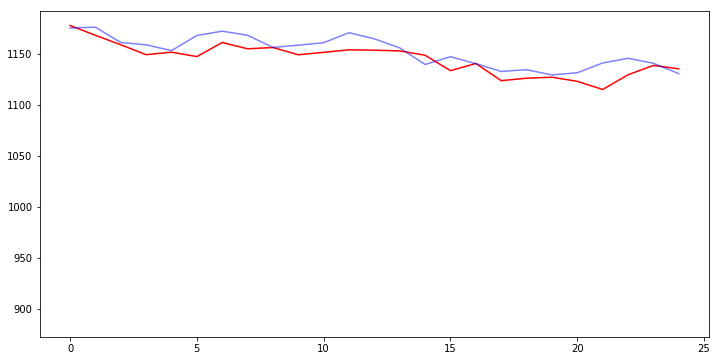

In [97]:
plt.figure(figsize=(12,6))
plt.plot(model.predict(x_test), color='r')
plt.plot(y_test, color='b', alpha=0.5)
plt.plot(np.mean(y_train), color='gray')
plt.legend()
plt.show()

In [89]:
model = Sequential()
model.add(Dense(200, input_dim=x.shape[1]))
model.add(Activation('relu'))
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dense(1))

adam = optimizers.adam(lr = 0.0005 )
model.compile(optimizer=adam,
              loss='mse', metrics=['mae'])

In [552]:
xtrain = x_train.close.copy().values
xtrain = np.reshape(xtrain, (xtrain.shape[0],1, 1))
xtest = x_test.close.copy().values
xtest = np.reshape(xtest, (xtest.shape[0],1, 1))

ValueError: cannot reshape array of size 2000 into shape (2000,8,1)

In [550]:
xtrain.shape

(1, 2000, 1)

In [551]:
net = Sequential()
net.add(LSTM(32, return_sequences=True, input_shape=(1,1)))
net.add(Dropout(0.2))
net.add(LSTM(32, return_sequences=True))
net.add(Dropout(0.2))
net.add(LSTM(32, return_sequences=True))
net.add(Dropout(0.2))
net.add(LSTM(32, return_sequences=True))
net.add(Dropout(0.2))
net.add(LSTM(1))
net.compile(optimizer='adam', loss='mse', metrics=['mae'])
net.fit(xtrain, y_train, epochs=10, verbose=2, validation_data=(xtest,y_test))

ValueError: Error when checking input: expected lstm_43_input to have shape (1, 1) but got array with shape (2000, 1)

In [545]:
prediction = net.predict(xtest)

In [546]:
prediction

array([[0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.76159],
       [0.

In [512]:
loss = history.history['loss']
val_loss = history.history['val_loss']
mae = history.history['mean_absolute_error']
epochs = range(1,len(loss)+1)

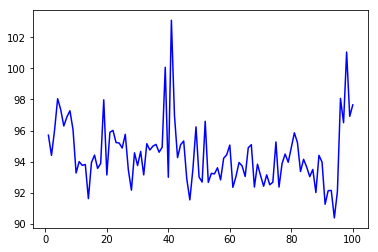

In [515]:
plt.plot(epochs, loss, 'b', label='Training ')
# plt.plot(epochs, val_loss,'b', label='Validation Acc')
plt.show()

In [553]:
from sklearn.preprocessing import StandardScaler

In [554]:
sc = StandardScaler()
newdf = sc.fit_transform(df)

In [558]:
newdf.shape

(2056, 6)

In [565]:
df.head()

,close,vol,dayofweek,is_quater_end,is_quater_start,target
0,518.54,1117259136,0,False,False,518.12
1,518.12,1232977792,1,False,False,520.96
2,520.96,2116183424,2,False,False,519.67
3,519.67,1617786368,3,False,False,523.70
4,523.70,1378444160,4,False,False,529.91


In [567]:
x = newdf[:,:5]
y = newdf[:,5]

In [582]:
xx = np.reshape(x, (x.shape[0],1,x.shape[1]))

In [585]:
net = Sequential()
net.add(LSTM(32, return_sequences=True, input_shape=(1,x.shape[1])))
net.add(Dropout(0.2))
net.add(LSTM(32, return_sequences=True))
net.add(Dropout(0.2))
net.add(LSTM(32, return_sequences=True))
net.add(Dropout(0.2))
net.add(LSTM(32, return_sequences=True))
net.add(Dropout(0.2))
net.add(LSTM(1))
net.compile(optimizer='adam', loss='mse', metrics=['mae'], batch_size=100)
net.fit(xx, y, epochs=10, verbose=2, batch_size = 100)

ValueError: Initializer for variable lstm_63/kernel/ is from inside a control-flow construct, such as a loop or conditional. When creating a variable inside a loop or conditional, use a lambda as the initializer.

In [572]:
predd = net.predict(xx)

In [573]:
rsquare(y,predd)

-2835.4574274086594

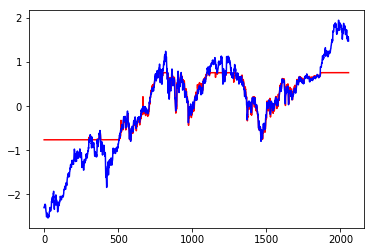

In [574]:
plt.plot(predd, color='r')
plt.plot(y, color='b')
plt.legend()
plt.show()